# Week 3: Variational Auto Encoder (VAE)
# Assignment: Building and Visualizaing a Latent Space with VAE and Generating New Text

**Note 1:** Before you run this notebook and start answering questions, I highly suggest that you click the "Runtime" menu at the top, then select "Change Runtime Type", finally select "T4 GPU". What this does is give you access to a dedicated GPU (Graphics Processing Unit). If you are unfamiliar this is video card of sorts which is really good at this sort of processing. If you don't do this then you can expect this notebook to take over an hour to run. (With the GPU it will still take a while)

**Note 2:** Don't change any of the code until after you have run the notebook and know the provided code works.

**Note 3:** The more text you train with, the better your newly generated sentances will be.

## 3.1 Setup the libraries, define the input data, visualize the matrix

In [1]:
# setting things up
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data sentances to place in the vector store
texts = [
    "Utica University offers courses in Machine Learning and AI #AI #Tech"
    "I Just attended an amazing AI workshop in California! #AI #Tech",
    "I love to read about technologies such as AI and Green Tech #reading #Teach",
    "I am the very model of a modern Major-General",
    "I’ve information vegetable, animal, and mineral",
    "I know the kings of England, and I quote the fights historical",
    "From Marathon to Waterloo, in order categorical",
    "I’m very well acquainted, too, with matters mathematical",
    "I understand equations, both the simple and quadratical",
    "About binomial theorem I’m teeming with a lot o’ news",
    "With many cheerful facts about the square of the hypotenuse."
]

# Initialize tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of numbers
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to ensure uniform input length
padded_sequences = pad_sequences(sequences, padding='post')

# Define vocabulary size (for embedding layer)
vocab_size = len(tokenizer.word_index) + 1
print("Padded Sequences:\n", padded_sequences)

Padded Sequences:
 [[15 16 17 18  6 19 20  3  4  4 21 22 23 24 25  4 26  6 27  4 10]
 [ 5 28 11 29  7 30 31 32  4  3 33 10 34 35  0  0  0  0  0  0  0]
 [ 5 36  2 12 37  8 13 38 39 40  0  0  0  0  0  0  0  0  0  0  0]
 [41 42 43 44  3 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 46  2 47  8 48  3  5 49  2 50 51  0  0  0  0  0  0  0  0  0]
 [52 53 11 54  6 55 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 12 57 58 59  9 60 61  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 62 63 64  2 65  3 66  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7 67 68 14 69  9 13 70 71 72  0  0  0  0  0  0  0  0  0  0  0]
 [ 9 73 74 75  7  2 76  8  2 77  0  0  0  0  0  0  0  0  0  0  0]]


## 3.2 Build and Autoencoder to Store the Matrix

In [2]:
# build the autoencoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, LSTM, RepeatVector

# Define Autoencoder architecture
input_dim = padded_sequences.shape[1]  # Length of padded sequence

# Encoder
input_layer = Input(shape=(input_dim,))
embedding_layer = Embedding(vocab_size, 64, input_length=input_dim)(input_layer)
encoded = LSTM(32)(embedding_layer)  # LSTM reduces sequence to latent space of 32 units

# Decoder
decoded = RepeatVector(input_dim)(encoded)
decoded = LSTM(64, return_sequences=True)(decoded)
decoded = Flatten()(decoded)
output_layer = Dense(input_dim)(decoded)

# Build and compile autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(padded_sequences, padded_sequences, epochs=100, batch_size=16, verbose=1)

# Encoder model (to extract latent space)
encoder = Model(inputs=input_layer, outputs=encoded)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 745.6144
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 744.9003
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 743.8994
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 742.2408
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 739.6276
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 735.7151
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 730.0715
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 722.1763
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 711.4401
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 697.3129
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 679.5107
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 658.2197
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 634.0518
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 607.8094
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 

## 3.3 Visualize the vectors of the sentances in the latent space

In [3]:
# extract the latent representations
# Get latent space representations (encoded output) for the input data
latent_space = encoder.predict(padded_sequences)

print("Latent Space Representations:\n", latent_space)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Latent Space Representations:
 [[ 0.01454778  0.02729608 -0.01603913 -0.05588912  0.00730275 -0.00441669
   0.00151774  0.08156876 -0.0401286   0.04765284  0.04556191 -0.02827318
  -0.02029915  0.04683954 -0.01705576  0.06572886  0.03029141  0.08232719
  -0.03299808 -0.12832445 -0.01631855  0.00536776  0.01794207 -0.1116458
   0.0435148  -0.05836054  0.04399955 -0.05572212  0.01655161 -0.01279966
  -0.02801337  0.06498503]
 [-0.33687276  0.6570841  -0.4019581   0.37111643  0.72272974 -0.6437712
  -0.30423817  0.730161   -0.6776337   0.7011013   0.7284011  -0.3042153
   0.41939366 -0.06353717  0.44150954  0.69605    -0.6962657   0.20593552
   0.44945356 -0.86842626  0.7106025  -0.45861098  0.583534   -0.67416734
   0.74975765 -0.62204623 -0.46406382 -0.7717243  -0.47344178 -0.54797333
  -0.6124757   0.5118057 ]
 [-0.37306607  0.67666554 -0.4073252   0.4469343   0.7740282  -0.66542494
  -0.29598814  0.7438443  -0.69620734  0.7211294   0.75154436 -0.

## 3.4 Now we can plot the latent space in order to see how sentances relate:

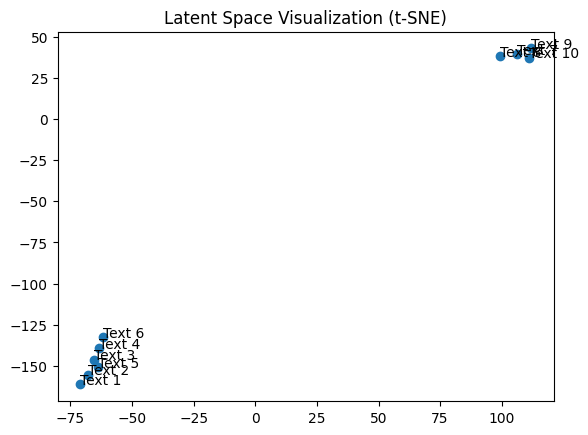

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce the latent space to 2D for visualization
tsne = TSNE(n_components=2, perplexity=2) # set perplexity to 2, which is less than the number of samples
latent_2d = tsne.fit_transform(latent_space)

# Plot the 2D latent space
plt.scatter(latent_2d[:, 0], latent_2d[:, 1])

# Annotate points
for i, text in enumerate(texts):
    plt.annotate(f'Text {i+1}', (latent_2d[i, 0], latent_2d[i, 1]))

plt.title('Latent Space Visualization (t-SNE)')
plt.show()

## 3.5 Add a new sentance and predict how it relates to others in the latent space

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
New Latent Space Vector:
 [[-0.50957656  0.7107278  -0.50219846  0.6013365   0.82154715 -0.6989681
  -0.46700254  0.7711456  -0.71923226  0.7438666   0.75388986 -0.1371293
   0.5222875  -0.2744372   0.514705    0.7317715  -0.75149363 -0.16249083
   0.6230608  -0.60356224  0.75322014 -0.61278015  0.68745816 -0.48864633
   0.7843076  -0.68214834 -0.6556374  -0.8042232  -0.60282373 -0.59470344
  -0.6667161   0.22313657]]


<ipython-input-5-631649d89a8e>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(latent_2d_with_new[:-1, 0], latent_2d_with_new[:-1, 1], cmap='viridis', label='Existing Texts')


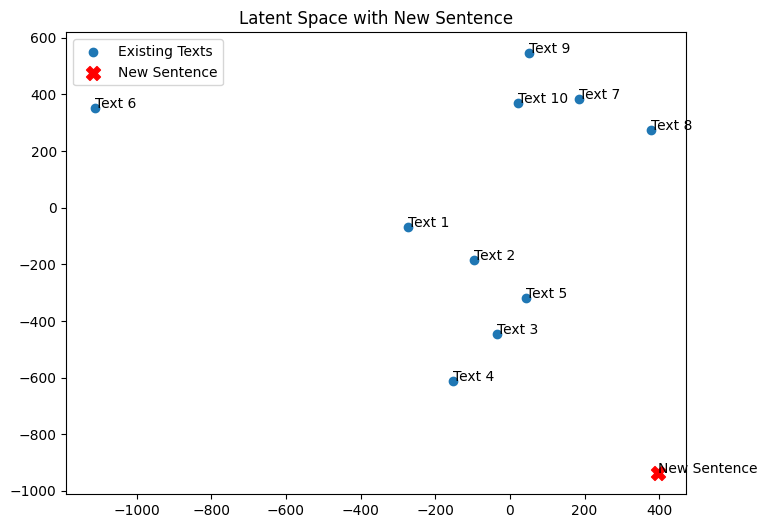

In [5]:
# Assuming the previous encoder and tokenizer are already loaded and available

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# New sentence to predict
new_sentence = "I have always wanted to go to Berlin"

# ==========================
# Preprocessing the New Sentence
# ==========================

# Convert the new sentence to a sequence of integers using the same tokenizer
new_sequence = tokenizer.texts_to_sequences([new_sentence])

# Pad the sequence to match the input length of the original autoencoder model
new_padded_sequence = pad_sequences(new_sequence, maxlen=padded_sequences.shape[1], padding='post')

# ==========================
# Use Encoder to Get Latent Space Representation of New Sentence
# ==========================

# Predict the latent space vector for the new sentence using the pre-trained encoder
new_latent_vector = encoder.predict(new_padded_sequence)

# Print the new latent space vector (optional)
print("New Latent Space Vector:\n", new_latent_vector)

# ==========================
# Combine the New Latent Vector with the Existing Latent Space
# ==========================

# Append the new latent vector to the existing latent space
latent_space_with_new = np.vstack([latent_space, new_latent_vector])

# ==========================
# Visualize Latent Space with the New Sentence
# ==========================

# Use t-SNE to reduce the latent space (including the new sentence) to 2D for visualization
tsne = TSNE(n_components=2, perplexity=2, random_state=42)  # Perplexity is set to 2 because we have 4 samples
latent_2d_with_new = tsne.fit_transform(latent_space_with_new)

# Plot the 2D latent space including the new sentence
plt.figure(figsize=(8, 6))

# Plot the original texts
scatter = plt.scatter(latent_2d_with_new[:-1, 0], latent_2d_with_new[:-1, 1], cmap='viridis', label='Existing Texts')

# Plot the new sentence in a different color or marker
plt.scatter(latent_2d_with_new[-1, 0], latent_2d_with_new[-1, 1], c='red', label='New Sentence', marker='X', s=100)

# Annotate original texts
for i, text in enumerate(texts):
    plt.annotate(f'Text {i+1}', (latent_2d_with_new[i, 0], latent_2d_with_new[i, 1]))

# Annotate the new sentence
plt.annotate('New Sentence', (latent_2d_with_new[-1, 0], latent_2d_with_new[-1, 1]))

plt.title('Latent Space with New Sentence')

plt.legend()
plt.show()

## 3.6 Train the VAE from the latent space so we can generate new text

In [6]:
# I'm using sparse_categorical_crossentropy with integer-encoded labels instead of one-hot-labels

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, RepeatVector, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# ==========================
# VAE Architecture
# ==========================

latent_dim = 16  # Size of the latent space
input_dim = padded_sequences.shape[1]  # Input sequence length
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size

# Encoder
input_layer = Input(shape=(input_dim,))
embedding_layer = Embedding(vocab_size, 64, input_length=input_dim)(input_layer)
lstm_layer = LSTM(64, return_sequences=False)(embedding_layer)

# Latent space representation (mean and log variance)
z_mean = Dense(latent_dim)(lstm_layer)
z_log_var = Dense(latent_dim)(lstm_layer)

# Reparameterization trick for sampling latent variables
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Apply the sampling function to get the latent vector
z = Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_lstm = RepeatVector(input_dim)(z)
decoder_lstm = LSTM(64, return_sequences=True)(decoder_lstm)
output_layer = Dense(vocab_size, activation='softmax')(decoder_lstm)

# Build the VAE model
vae = Model(input_layer, output_layer)

# ==========================
# Define KL Divergence Loss in Custom Layer
# ==========================

class KLDivergenceLayer(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        self.add_loss(K.mean(kl_loss))  # Removed inputs argument
        return z_mean  # Return z_mean to continue the computation

# Add the KL divergence as a custom layer
kl_layer = KLDivergenceLayer()([z_mean, z_log_var])

# ==========================
# Define VAE Loss Function
# ==========================

def vae_loss(y_true, y_pred):
    # Reconstruction loss (using sparse categorical crossentropy for multi-class output)
    reconstruction_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    reconstruction_loss *= input_dim
    return K.mean(reconstruction_loss)

# Compile the VAE with the modified loss
vae.compile(optimizer='adam', loss=vae_loss)
vae.summary()

# ==========================
# Train the VAE
# ==========================

# Do NOT use one-hot encoding; use integer-encoded labels (padded_sequences as target)
y_train = padded_sequences  # Use the integer-encoded sequences directly

# Train the VAE on the input sequences
vae.fit(padded_sequences, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 21)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 21, 64)         │          4,992 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         33,024 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 16)             │          1,040 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 16)             │          1,040 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 16)             │              0 │ dense_1[0][0],         │
│                           │                        │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_1           │ (None, 21, 16)         │              0 │ lambda[0][0]           │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 21, 64)         │         20,736 │ repeat_vector_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 21, 78)         │          5,070 │ lstm_3[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 65,902 (257.43 KB)

 Trainable params: 65,902 (257.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 92.7917
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 91.3725
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 91.2157
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 91.3350
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 90.0344
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 89.2866
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 90.0278
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 89.1562
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 88.8857
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 89.7165
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 87.1668
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 86.3414
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 83.3922
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 81.7586
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 80.6993

## 3.7 Generate some new random text (first pass)

In [7]:
import numpy as np

# ==========================
# Define the Decoder Model Separately
# ==========================

# Use the same structure as in the original VAE for the decoder
decoder_input = Input(shape=(latent_dim,))
decoder_lstm = RepeatVector(input_dim)(decoder_input)
decoder_lstm = LSTM(64, return_sequences=True)(decoder_lstm)
decoder_output = Dense(vocab_size, activation='softmax')(decoder_lstm)

# Build the decoder model
decoder = Model(decoder_input, decoder_output)

# ==========================
# Generate New Text from Latent Space
# ==========================

# Sample a random latent vector from a standard normal distribution
def sample_latent_space(latent_dim, num_samples=1):
    return np.random.normal(size=(num_samples, latent_dim))

# Decode the latent vector to generate a sequence of words
def decode_latent_vector(latent_vector):
    # Use the decoder to predict word probabilities for the sequence
    generated_sequence = decoder.predict(latent_vector)

    # Convert the predicted word indices to actual words
    generated_text = ''
    for word_probs in generated_sequence[0]:  # For each time step
        word_index = np.argmax(word_probs)  # Get the index of the word with the highest probability
        word = tokenizer.index_word.get(word_index, '')  # Convert index to word using tokenizer
        if word:  # Avoid empty strings
            generated_text += word + ' '

    return generated_text.strip()

# ==========================
# Generate Text Samples
# ==========================

# Sample random latent vectors
latent_vector = sample_latent_space(latent_dim, num_samples=1)

# Decode the latent vector into text
generated_text = decode_latent_vector(latent_vector)

print("Generated Text:", generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Generated Text: mathematical mathematical marathon marathon marathon marathon marathon marathon information information information information information information information information information information information information information


## 3.8 Change the "Temperature" of the text generation to remove duplicate word generation

In [8]:
import numpy as np

# ==========================
# Define the Decoder Model Separately
# ==========================

# Use the same structure as in the original VAE for the decoder
decoder_input = Input(shape=(latent_dim,))
decoder_lstm = RepeatVector(input_dim)(decoder_input)
decoder_lstm = LSTM(64, return_sequences=True)(decoder_lstm)
decoder_output = Dense(vocab_size, activation='softmax')(decoder_lstm)

# Build the decoder model
decoder = Model(decoder_input, decoder_output)

# ==========================
# Temperature Sampling Function
# ==========================

def sample_with_temperature(predictions, temperature=1.0):
    """Applies temperature sampling to predictions."""
    predictions = np.asarray(predictions).astype('float64')
    predictions = np.log(predictions + 1e-10) / temperature  # Apply temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)  # Normalize to get probabilities
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

# ==========================
# Generate New Text from Latent Space
# ==========================

# Sample a random latent vector from a standard normal distribution
def sample_latent_space(latent_dim, num_samples=1):
    return np.random.normal(size=(num_samples, latent_dim))

# Decode the latent vector to generate a sequence of words
def decode_latent_vector(latent_vector, temperature=1.0):
    # Use the decoder to predict word probabilities for the sequence
    generated_sequence = decoder.predict(latent_vector)

    # Convert the predicted word probabilities to actual words
    generated_text = ''
    for word_probs in generated_sequence[0]:  # For each time step
        word_index = sample_with_temperature(word_probs, temperature=temperature)  # Apply temperature sampling
        word = tokenizer.index_word.get(word_index, '')  # Convert index to word using tokenizer
        if word:  # Avoid empty strings
            generated_text += word + ' '

    return generated_text.strip()

# ==========================
# Generate Text Samples
# ==========================

# Sample random latent vectors
latent_vector = sample_latent_space(latent_dim, num_samples=1)

# Decode the latent vector into text with temperature sampling
generated_text = decode_latent_vector(latent_vector, temperature=1.0)  # Experiment with different temperatures

print("Generated Text:", generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Generated Text: modern machine very i theorem in facts to machine vegetable quote an in well i’m love <OOV> modern an cheerful


## 3.9 Let's visualize all dimensions of the latent space (Multiple 2D plots):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Number of Samples: 10
Latent Space Dimensions: 32
Latent Dimension 1: Mean = -0.4791, Variance = 0.0475, Min = -0.6926, Max = 0.0145
Latent Dimension 2: Mean = 0.6496, Variance = 0.0447, Min = 0.0273, Max = 0.7641
Latent Dimension 3: Mean = -0.4745, Variance = 0.0337, Min = -0.6395, Max = -0.0160
Latent Dimension 4: Mean = 0.5344, Variance = 0.0590, Min = -0.0559, Max = 0.7512
Latent Dimension 5: Mean = 0.7391, Variance = 0.0622, Min = 0.0073, Max = 0.8742
Latent Dimension 6: Mean = -0.6400, Variance = 0.0468, Min = -0.7604, Max = -0.0044
Latent Dimension 7: Mean = -0.4219, Variance = 0.0387, Min = -0.6183, Max = 0.0015
Latent Dimension 8: Mean = 0.7071, Variance = 0.0444, Min = 0.0816, Max = 0.8109
Latent Dimension 9: Mean = -0.6614, Variance = 0.0441, Min = -0.7700, Max = -0.0401
Latent Dimension 10: Mean = 0.6796, Variance = 0.0452, Min = 0.0477, Max = 0.7826
Latent Dimension 11: Mean = 0.6711, Variance = 0.0436, Min = 0.0456, Max = 0.7590
Laten

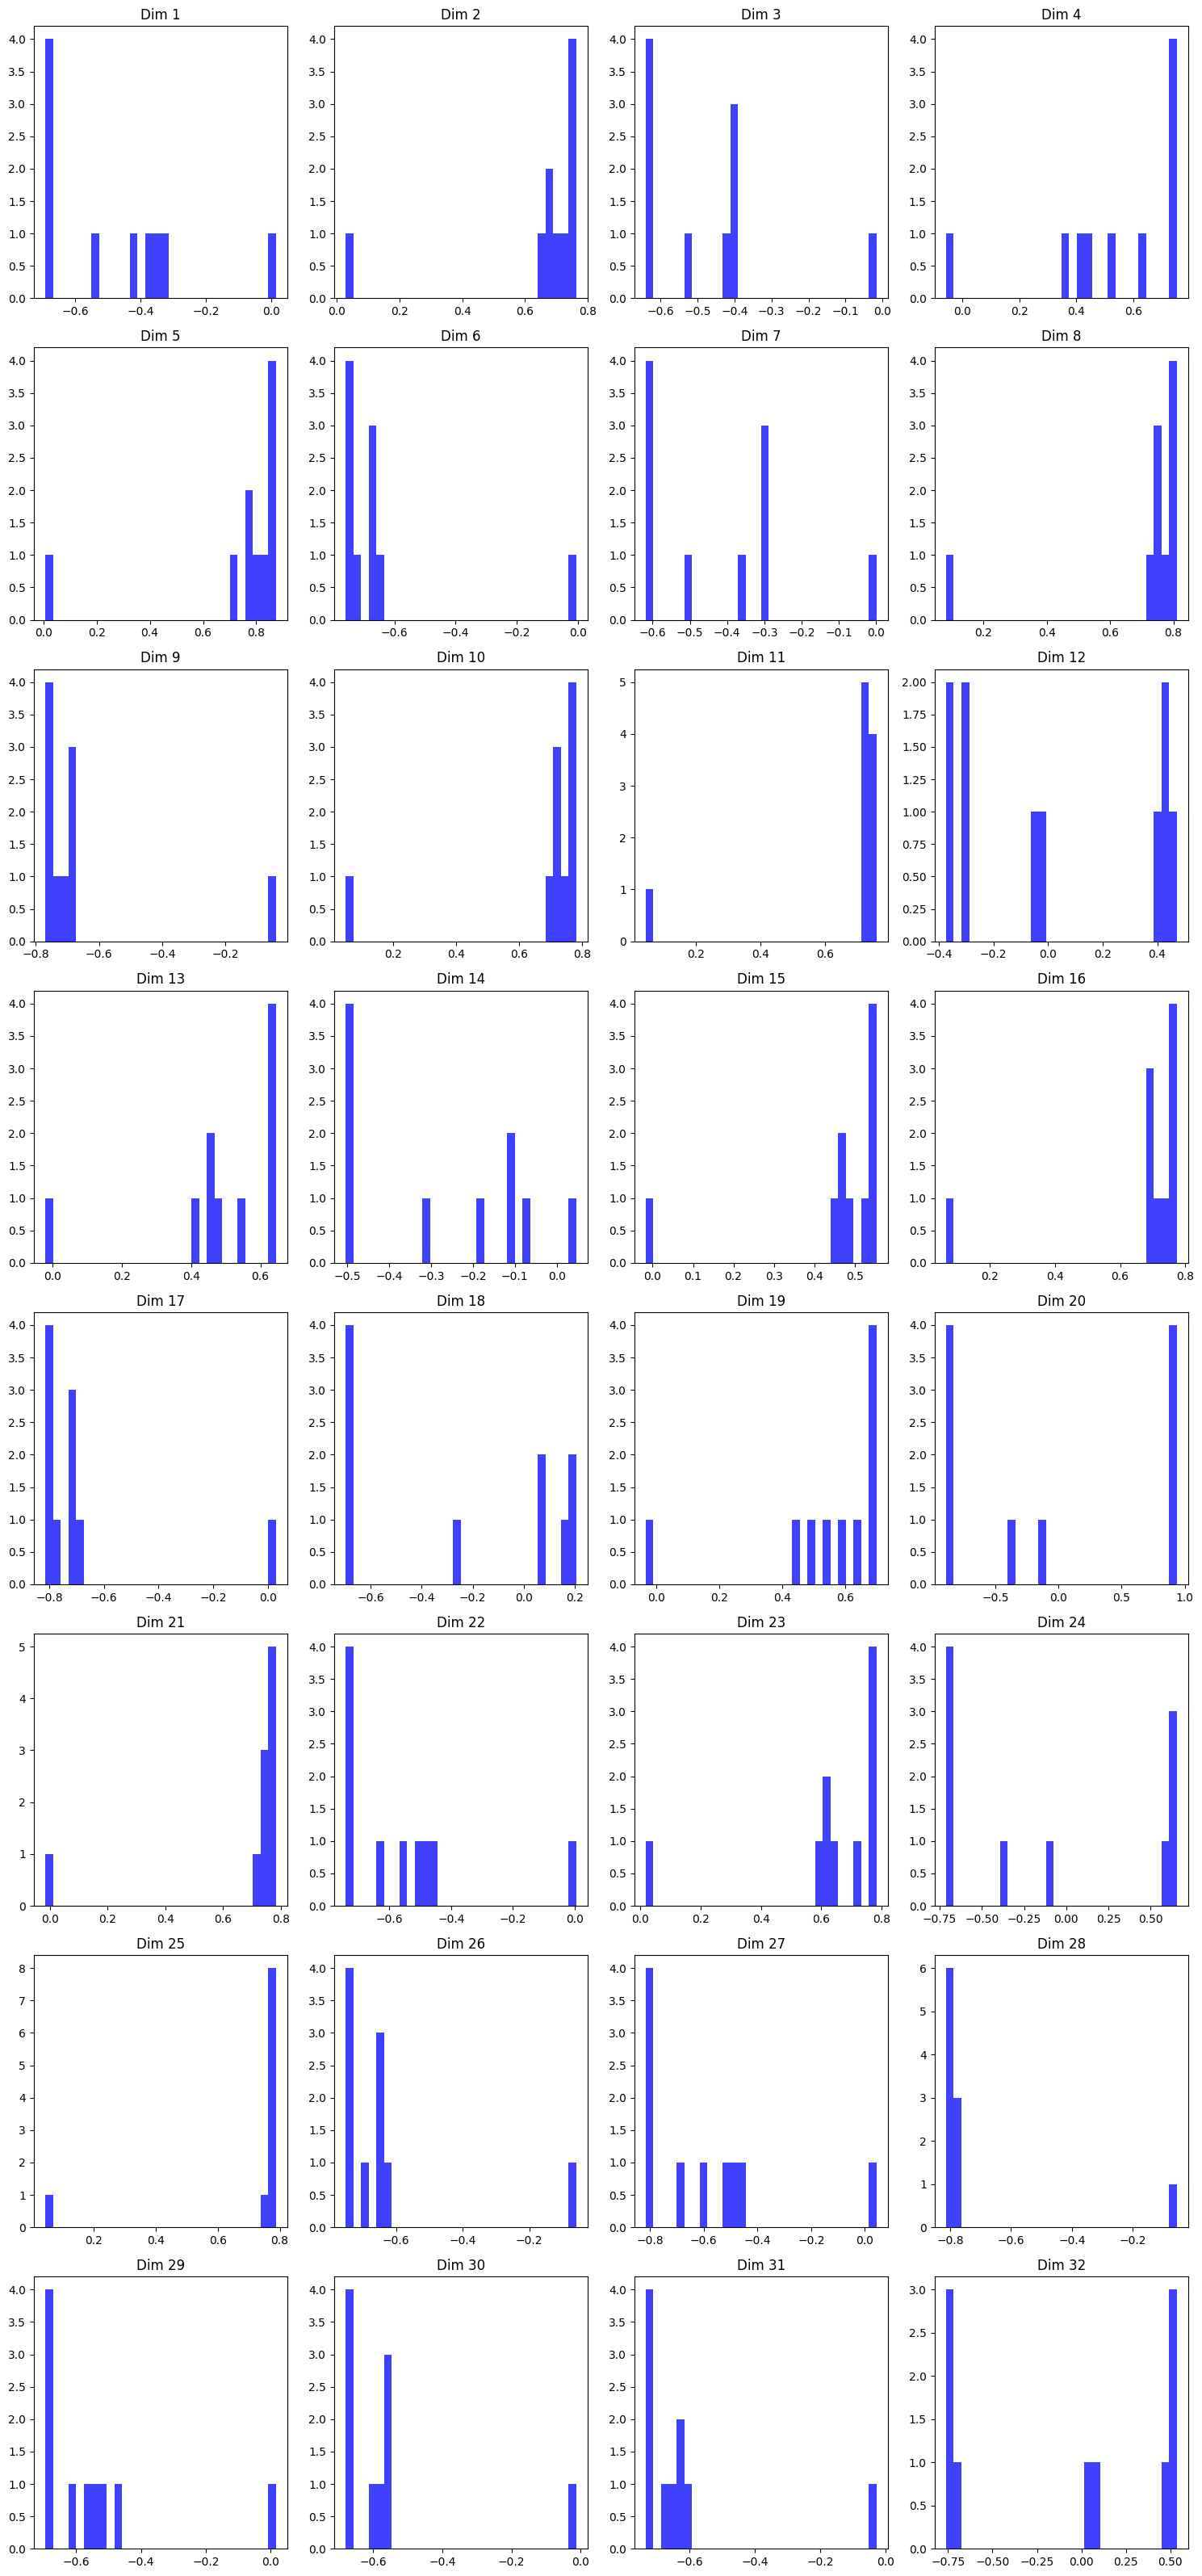

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Measure the Latent Space
# ==========================

# Function to measure and visualize the latent space
def measure_latent_space(padded_sequences, encoder_model):
    # Encode the input sequences to get their latent space representations
    latent_vectors = encoder_model.predict(padded_sequences)

    # Get the dimensions of the latent space
    num_samples, latent_dim = latent_vectors.shape
    print(f"Number of Samples: {num_samples}")
    print(f"Latent Space Dimensions: {latent_dim}")

    # Compute basic statistics (mean, variance, min, max) for each dimension in the latent space
    latent_mean = np.mean(latent_vectors, axis=0)
    latent_var = np.var(latent_vectors, axis=0)
    latent_min = np.min(latent_vectors, axis=0)
    latent_max = np.max(latent_vectors, axis=0)

    # Print statistics for each dimension
    for i in range(latent_dim):
        print(f"Latent Dimension {i+1}: Mean = {latent_mean[i]:.4f}, Variance = {latent_var[i]:.4f}, Min = {latent_min[i]:.4f}, Max = {latent_max[i]:.4f}")

    # Determine the number of rows and columns for the subplot grid
    num_cols = 4  # Number of columns
    num_rows = int(np.ceil(latent_dim / num_cols))  # Calculate the number of rows needed

    # Plot the distribution of latent values for each dimension
    plt.figure(figsize=(15, num_rows * 4))  # Adjust the size based on rows and columns
    for i in range(latent_dim):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.hist(latent_vectors[:, i], bins=30, alpha=0.75, color='blue')
        plt.title(f"Dim {i+1}")
    plt.tight_layout()
    plt.show()

# ==========================
# Measure the Latent Space for Your Model
# ==========================

# Measure the latent space coverage using the encoder and the padded_sequences dataset
measure_latent_space(padded_sequences, encoder)

## 3.10 Now we can measure the latent space in a way that's human readable (Kilobytes, Megabytes, etc) as well as number of samples, dimensionality, and more.

data type of latent vectors (float 32, 64, etc)

we can use the standard: Memory Size = Number of Samples * Latent Dimensions * Size of each element

In [10]:
import numpy as np

# ==========================
# Measure Memory Size of the Latent Space
# ==========================

def measure_memory_size(latent_vectors):
    # Number of elements in the latent space
    num_samples, latent_dim = latent_vectors.shape

    # Get the data type of the latent vectors (assumed to be float32 in this case)
    dtype = latent_vectors.dtype
    dtype_size = np.dtype(dtype).itemsize  # Get the size of each element in bytes (float32 = 4 bytes)

    # Calculate the total memory size in bytes
    total_memory_bytes = num_samples * latent_dim * dtype_size

    # Convert to kilobytes (KB), megabytes (MB), and gigabytes (GB) for readability
    total_memory_kb = total_memory_bytes / 1024
    total_memory_mb = total_memory_kb / 1024
    total_memory_gb = total_memory_mb / 1024

    # Print the memory size in different units
    print(f"Memory Size of Latent Space:")
    print(f"  - {total_memory_bytes} bytes")
    print(f"  - {total_memory_kb:.2f} KB")
    print(f"  - {total_memory_mb:.2f} MB")
    print(f"  - {total_memory_gb:.6f} GB")

    return total_memory_bytes

# ==========================
# Measure Memory Usage for the Latent Space Representations
# ==========================

# Assuming you already have the latent vectors (output from the encoder)
latent_vectors = encoder.predict(padded_sequences)

# Measure the memory size of the latent space
measure_memory_size(latent_vectors)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Memory Size of Latent Space:
  - 1280 bytes
  - 1.25 KB
  - 0.00 MB
  - 0.000001 GB


1280

## 3.11 The measurement of the latent space doesn't mean much unless we compare it to our original input data size

In [11]:
# ==========================
# Measure Memory Size of Input Sentences
# ==========================

def measure_input_sentence_memory(padded_sequences):
    # Get the data type and size of the input sequences (assumed to be int32 in this case)
    dtype = padded_sequences.dtype
    dtype_size = np.dtype(dtype).itemsize  # Get the size of each element in bytes (int32 = 4 bytes)

    # Calculate the total memory size of the input sequences
    num_samples, sequence_length = padded_sequences.shape
    total_memory_bytes = num_samples * sequence_length * dtype_size

    # Convert to kilobytes (KB), megabytes (MB), and gigabytes (GB)
    total_memory_kb = total_memory_bytes / 1024
    total_memory_mb = total_memory_kb / 1024
    total_memory_gb = total_memory_mb / 1024

    # Print the memory size of input sentences in different units
    print(f"Memory Size of Input Sentences:")
    print(f"  - {total_memory_bytes} bytes")
    print(f"  - {total_memory_kb:.2f} KB")
    print(f"  - {total_memory_mb:.2f} MB")
    print(f"  - {total_memory_gb:.6f} GB")

    return total_memory_bytes

# ==========================
# Compare Input Sentences with Latent Space
# ==========================

# Measure the memory size of the input sentences
input_sentence_memory = measure_input_sentence_memory(padded_sequences)

# Measure the memory size of the latent space
latent_space_memory = measure_memory_size(latent_vectors)

# Print the comparison
print(f"Comparison:")
print(f"  - Latent Space Memory: {latent_space_memory / 1024 / 1024:.4f} MB")
print(f"  - Input Sentences Memory: {input_sentence_memory / 1024 / 1024:.4f} MB")
print(f"  - Ratio (Latent / Input): {latent_space_memory / input_sentence_memory:.4f}")

Memory Size of Input Sentences:
  - 840 bytes
  - 0.82 KB
  - 0.00 MB
  - 0.000001 GB
Memory Size of Latent Space:
  - 1280 bytes
  - 1.25 KB
  - 0.00 MB
  - 0.000001 GB
Comparison:
  - Latent Space Memory: 0.0012 MB
  - Input Sentences Memory: 0.0008 MB
  - Ratio (Latent / Input): 1.5238


So currently our latent space is bigger in size than our input sentances, which is not a fair representation because the input data is so small. When more input data is given (more sentances) the model size disparity will be significantly reduced because words / sentances will not be duplicated in the latent space

If this were a larger model I would go with a latend-dim (dimentional reduction)

In [12]:
# Reflection Questions:

# 1. What patterns did you observe in the latent space visualization?
# 2. How did temperature settings affect the quality of the generated sentences?
# 3. What insights did you gain from the compression ratio analysis?
